In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('owid-covid-data.csv')

# Problem Definition
The project's goal, is to deliver actionable information that would aid Health officials in adopting effective public health actions to decrease COVID-19 transmission and the pandemic's overall impact. To be more explicit, we will forecast the reproduction rate based on other features because this index reflects the severity of virus control and which other indexes have the most impact on this.

##### Research Question:
What is the goal of the project and how will it aid health officials in adopting effective public health actions to decrease COVID-19 transmission and the pandemic's overall impact? How will the reproduction rate be forecasted, and what other features will be used in the forecasting process? What is the significance of the reproduction rate in reflecting the severity of virus control, and which other indexes are expected to have the most impact on it?

In [493]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


# Data Visualization

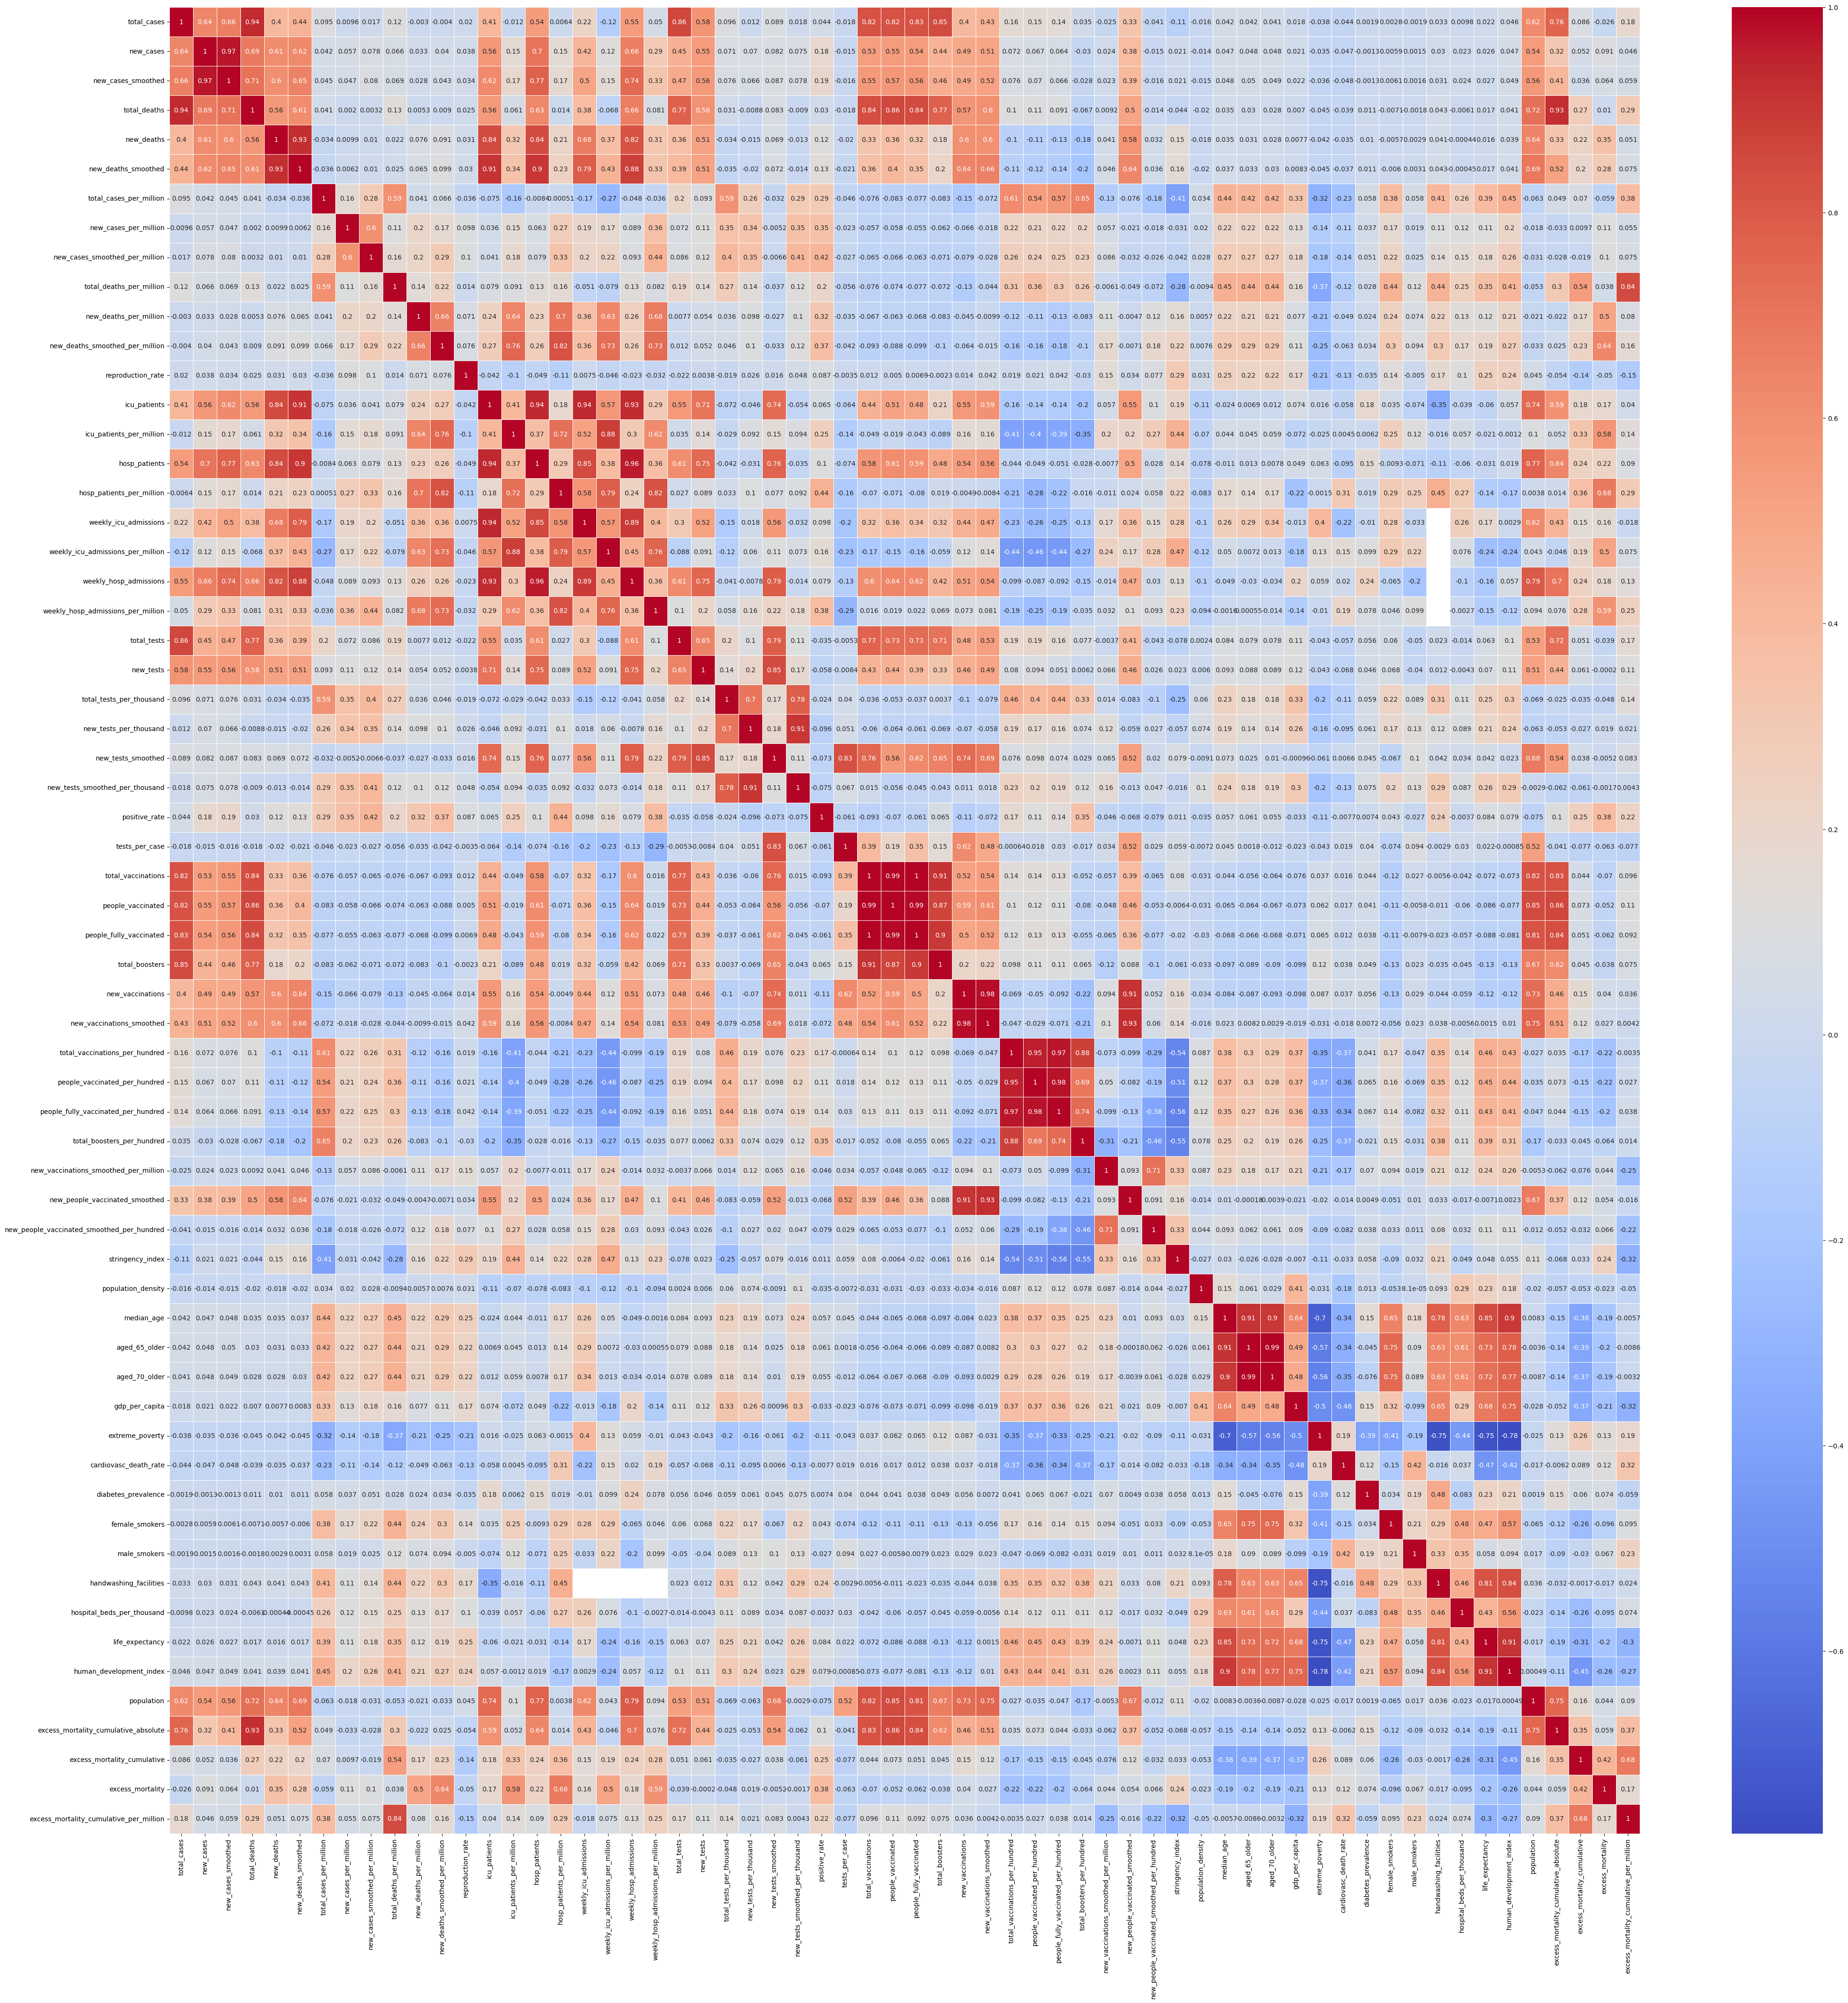

In [494]:
# Calculating the correlation matrix to understand the relationship between different vairables that were selected and
# the target variable reproduction_rate.
correlation_matrix = df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Data Processing and Feature Engineering

In [495]:
# Droppping all the irrelevant columns
df2 = df[['location', 'date', 'reproduction_rate', 'life_expectancy', 'people_fully_vaccinated', 'gdp_per_capita', 'aged_65_older']]

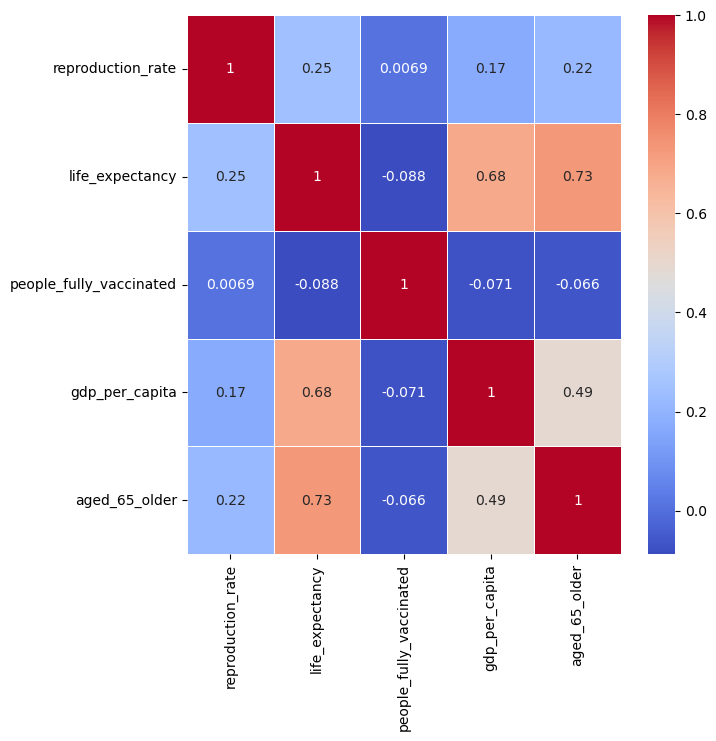

In [496]:
# Calculating the correlation matrix to further understand the relationship between different vairables that were selected
# the target variable reproduction_rate.
correlation_matrix = df2.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [497]:
df2.head(100)

,location,date,reproduction_rate,life_expectancy,people_fully_vaccinated,gdp_per_capita,aged_65_older
0,Afghanistan,2020-02-24,NaN,64.83,NaN,1803.987,2.581
1,Afghanistan,2020-02-25,NaN,64.83,NaN,1803.987,2.581
2,Afghanistan,2020-02-26,NaN,64.83,NaN,1803.987,2.581
3,Afghanistan,2020-02-27,NaN,64.83,NaN,1803.987,2.581
4,Afghanistan,2020-02-28,NaN,64.83,NaN,1803.987,2.581
...,...,...,...,...,...,...,...
95,Afghanistan,2020-05-29,1.24,64.83,NaN,1803.987,2.581
96,Afghanistan,2020-05-30,1.22,64.83,NaN,1803.987,2.581
97,Afghanistan,2020-05-31,1.21,64.83,NaN,1803.987,2.581
98,Afghanistan,2020-06-01,1.19,64.83,NaN,1803.987,2.581


In [498]:
df2.shape

(255596, 7)

### Dropping the Null Values DF3

In [499]:
df3 = df2.dropna()

In [500]:
df3.head(100)

,location,date,reproduction_rate,life_expectancy,people_fully_vaccinated,gdp_per_capita,aged_65_older
442,Afghanistan,2021-05-11,1.28,64.83,55624.0,1803.987,2.581
451,Afghanistan,2021-05-20,1.34,64.83,77560.0,1803.987,2.581
455,Afghanistan,2021-05-24,1.38,64.83,96910.0,1803.987,2.581
457,Afghanistan,2021-05-26,1.39,64.83,111082.0,1803.987,2.581
458,Afghanistan,2021-05-27,1.39,64.83,113739.0,1803.987,2.581
...,...,...,...,...,...,...,...
2630,Albania,2021-05-31,0.61,78.57,290333.0,11803.431,13.188
2631,Albania,2021-06-01,0.62,78.57,293264.0,11803.431,13.188
2633,Albania,2021-06-03,0.62,78.57,297271.0,11803.431,13.188
2636,Albania,2021-06-06,0.64,78.57,306102.0,11803.431,13.188


In [501]:
df3.shape

(47800, 7)

### Dates are now separated into Years
Converting date column to Datetime Format, more specifically into Year to group the data into location and year.


In [502]:
df5 = df3.copy()

In [503]:
df5['date'] = pd.to_datetime(df5['date'])
df5.loc[:, 'year'] = df5['date'].dt.year

df5.head(3)


,location,date,reproduction_rate,life_expectancy,people_fully_vaccinated,gdp_per_capita,aged_65_older,year
442,Afghanistan,2021-05-11,1.28,64.83,55624.0,1803.987,2.581,2021
451,Afghanistan,2021-05-20,1.34,64.83,77560.0,1803.987,2.581,2021
455,Afghanistan,2021-05-24,1.38,64.83,96910.0,1803.987,2.581,2021


In [504]:
df5.head(0)

,location,date,reproduction_rate,life_expectancy,people_fully_vaccinated,gdp_per_capita,aged_65_older,year


In [505]:
df5.describe()

,reproduction_rate,life_expectancy,people_fully_vaccinated,gdp_per_capita,aged_65_older,year
count,47800.000000,47800.000000,4.780000e+04,47800.000000,47800.000000,47800.000000
mean,0.983179,76.496581,7.113353e+07,25906.946844,12.040822,2021.443054
std,0.316414,5.813962,4.497771e+08,19045.245364,6.408226,0.503736
min,-0.030000,53.280000,1.000000e+00,661.240000,1.144000,2020.000000
25%,0.810000,73.510000,7.085980e+05,11669.077000,6.293000,2021.000000
50%,0.980000,77.010000,4.051674e+06,22767.037000,11.733000,2021.000000
75%,1.150000,81.330000,1.769351e+07,36513.323000,18.517000,2022.000000
max,4.080000,84.630000,5.056630e+09,116935.600000,27.049000,2023.000000


### Visualizing the the features

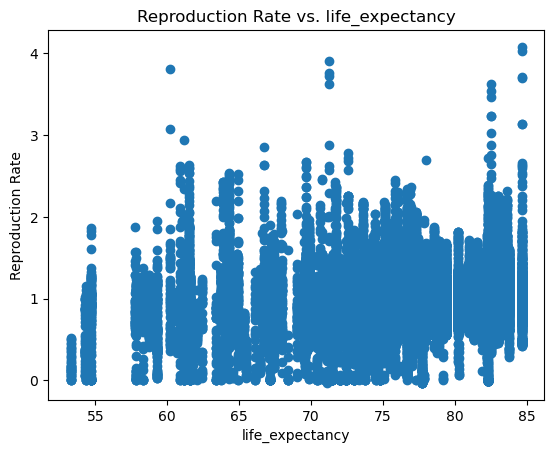

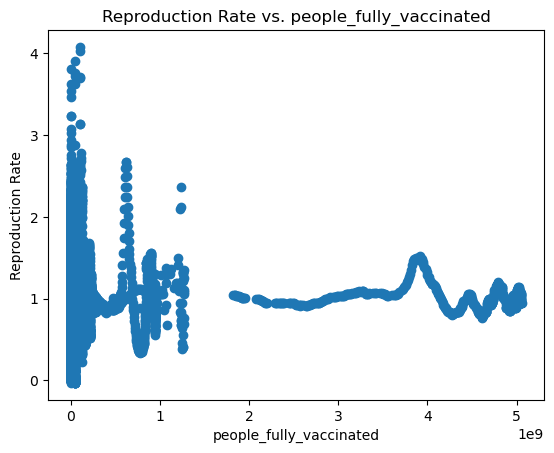

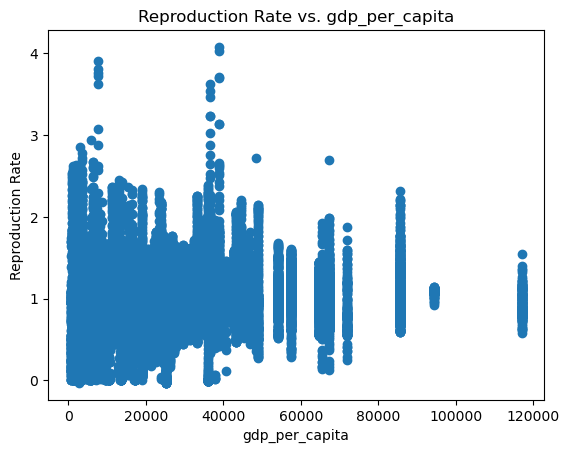

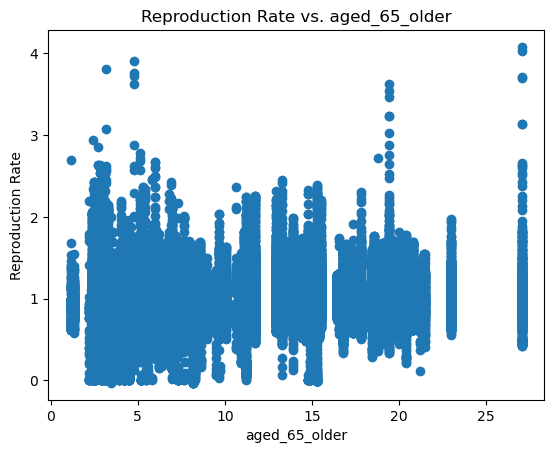

In [506]:
for feature in ['life_expectancy', 'people_fully_vaccinated', 'gdp_per_capita', 'aged_65_older']:
    plt.figure()
    plt.scatter(df5[feature], df5['reproduction_rate'])
    plt.xlabel(feature)
    plt.ylabel('Reproduction Rate')
    plt.title(f'Reproduction Rate vs. {feature}')
    plt.show()

### Visualizations show the features against the target feature reproduction_rate are non-linear.

### Dropping the date column, as data will only be aggregated by Year and Location.

In [507]:
df6 = df5.drop('date', axis=1)

df6.head(0)

,location,reproduction_rate,life_expectancy,people_fully_vaccinated,gdp_per_capita,aged_65_older,year


### Aggregating the Data by Country and Year
Aggregating the data by location and year reduces the noise, as it helps in reducing the size of the data and also reduces the noise. The aggregation also helps in modeling by reducing the noise in the data and providing a more concise and representative view of the data.

In [508]:
df7 = df6.groupby(['location', 'year'])
location_stats = df7

In [509]:
df7.head(0)

,location,reproduction_rate,life_expectancy,people_fully_vaccinated,gdp_per_capita,aged_65_older,year


In [510]:
df7.describe()

reproduction_rate                                          \
                             count      mean       std   min    25%    50%   
location    year                                                             
Afghanistan 2021              19.0  1.165263  0.220766  0.64  1.005  1.210   
            2022              57.0  1.097193  0.224203  0.76  0.930  1.030   
Albania     2021             164.0  1.073963  0.342683  0.59  0.890  1.010   
            2022              47.0  0.969362  0.382056  0.56  0.645  0.900   
Algeria     2021              16.0  1.036875  0.161481  0.74  0.955  1.115   
...                            ...       ...       ...   ...    ...    ...   
Yemen       2022              24.0  0.398333  0.411526  0.00  0.040  0.215   
Zambia      2021             120.0  1.105083  0.538598  0.68  0.730  0.790   
            2022             105.0  0.892857  0.257800  0.17  0.730  0.870   
Zimbabwe    2021             260.0  1.154385  0.464125  0.63  0.800  1.010   
            2022             232.0  0.925216  0.249503  0.57  0.740  0.850   

                               life_expectancy         ... gdp_per_capita  \
                     75%   max           count   mean  ...            75%   
location    year                                       ...                  
Afghanistan 2021  1.3550  1.39            19.0  64.83  ...       1803.987   
            2022  1.2300  1.55            57.0  64.83  ...       1803.987   
Albania     2021  1.3250  1.86           164.0  78.57  ...      11803.431   
            2022  1.1100  1.88            47.0  78.57  ...      11803.431   
Algeria     2021  1.1525  1.19            16.0  76.88  ...      13913.839   
...                  ...   ...             ...    ...  ...            ...   
Yemen       2022  0.6500  1.21            24.0  66.12  ...       1479.147   
Zambia      2021  1.4125  2.43           120.0  63.89  ...       3689.251   
            2022  1.0900  1.36           105.0  63.89  ...       3689.251   
Zimbabwe    2021  1.4225  2.63           260.0  61.49  ...       1899.775   
            2022  1.1200  1.49           232.0  61.49  ...       1899.775   

                            aged_65_older                                \
                        max         count    mean           std     min   
location    year                                                          
Afghanistan 2021   1803.987          19.0   2.581  9.125166e-16   2.581   
            2022   1803.987          57.0   2.581  4.480367e-16   2.581   
Albania     2021  11803.431         164.0  13.188  4.810853e-14  13.188   
            2022  11803.431          47.0  13.188  1.077337e-14  13.188   
Algeria     2021  13913.839          16.0   6.211  9.173067e-16   6.211   
...                     ...           ...     ...           ...     ...   
Yemen       2022   1479.147          24.0   2.922  1.360922e-15   2.922   
Zambia      2021   3689.251         120.0   2.480  1.337854e-15   2.480   
            2022   3689.251         105.0   2.480  4.015972e-15   2.480   
Zimbabwe    2021   1899.775         260.0   2.822  2.224728e-15   2.822   
            2022   1899.775         232.0   2.822  2.225247e-15   2.822   

                                                  
                     25%     50%     75%     max  
location    year                                  
Afghanistan 2021   2.581   2.581   2.581   2.581  
            2022   2.581   2.581   2.581   2.581  
Albania     2021  13.188  13.188  13.188  13.188  
            2022  13.188  13.188  13.188  13.188  
Algeria     2021   6.211   6.211   6.211   6.211  
...                  ...     ...     ...     ...  
Yemen       2022   2.922   2.922   2.922   2.922  
Zambia      2021   2.480   2.480   2.480   2.480  
            2022   2.480   2.480   2.480   2.480  
Zimbabwe    2021   2.822   2.822   2.822   2.822  
            2022   2.822   2.822   2.822   2.822  

[404 rows x 40 columns]

In [511]:
df7.head()

,location,reproduction_rate,life_expectancy,people_fully_vaccinated,gdp_per_capita,aged_65_older,year
442,Afghanistan,1.28,64.83,55624.0,1803.987,2.581,2021
451,Afghanistan,1.34,64.83,77560.0,1803.987,2.581,2021
455,Afghanistan,1.38,64.83,96910.0,1803.987,2.581,2021
457,Afghanistan,1.39,64.83,111082.0,1803.987,2.581,2021
458,Afghanistan,1.39,64.83,113739.0,1803.987,2.581,2021
...,...,...,...,...,...,...,...
255194,Zimbabwe,0.79,61.49,3140338.0,1899.775,2.822,2022
255195,Zimbabwe,0.77,61.49,3144021.0,1899.775,2.822,2022
255196,Zimbabwe,0.76,61.49,3147652.0,1899.775,2.822,2022
255197,Zimbabwe,0.74,61.49,3153051.0,1899.775,2.822,2022


As it is observed from the visualizations above, the visualized graph does not show a linear relationship between the dependent and the independent features.

# Modelling

Split the data into X and y, to prepare the data for machine learning models, as it separates the input and output variables into separate arrays that can be used for training and testing the models.

In [512]:
X = df7[['life_expectancy', 'people_fully_vaccinated', 'gdp_per_capita', 'aged_65_older']]
y = df7['reproduction_rate']

#### Converting to features is important as their Mean presents a float value.

In [513]:
# Convert y features to float
y = y.apply(lambda x: x.astype('float64'))

# Convert X features to float
X = X.apply(lambda x: x.astype('float64'))

# Imputing all the missing values in y the taget variable reproduction rate with the mean
y = y.fillna(y.mean())

In [514]:
# Impute missing values in X with the mean using the SimpleImputer library.
# Initializes a new SimpleImputer object imputer with a strategy of 'mean', this object will be used to impute any missing values in the data.
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [515]:
# Split the data into training and testing sets for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardizing the data from the final dataframe.
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### The random forest regression model was trained using the training data. This model was chosen because it performs well with onedependent variable and multiple independent variables when they have a non-linear relationship.

In [516]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

#### Evaluating the model, the R2 Score and the Root Mean Squared Error (RMSE) are used as evaluation metrics to assess theperformance of the Random Forest Regression model in predicting the COVID-19 reproduction rate based on the selected features.

In [517]:
print('R2 Score:', r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.941408876469847
Root Mean Squared Error: 0.07598432277685598


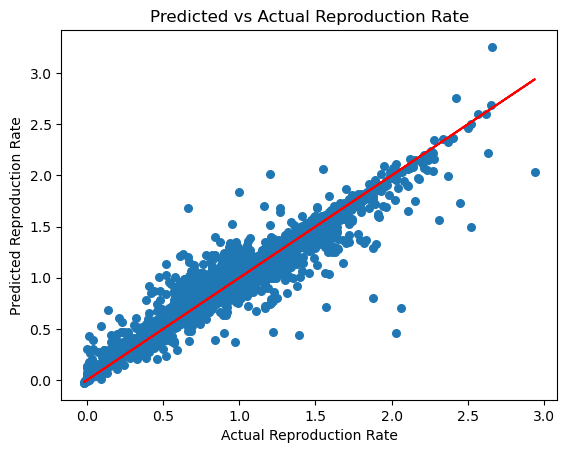

In [518]:
plt.scatter(y_test, y_pred, s=30)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Reproduction Rate')
plt.ylabel('Predicted Reproduction Rate')
plt.title('Predicted vs Actual Reproduction Rate')
plt.show()

#### This code calculates permutation feature importances for the given machine learning model and the test data. The feature importances are then plotted as a bar graph to visualize the relative importance of each feature. 

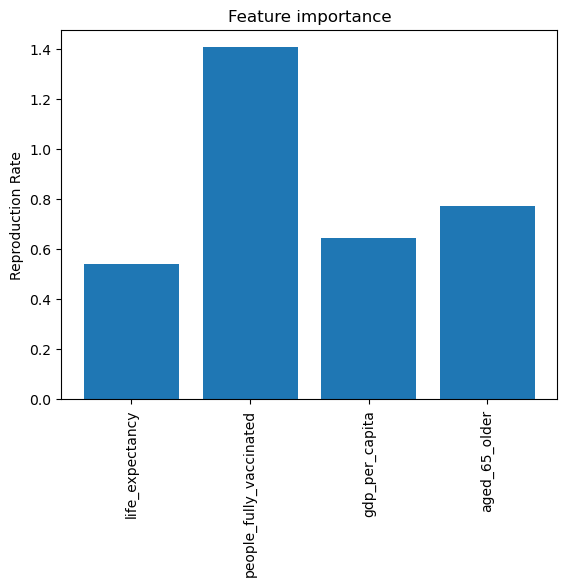

In [519]:
z = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_mean = z.importances_mean

plt.bar(range(X.shape[1]), importance_mean)
plt.xticks(range(X.shape[1]), ['life_expectancy', 'people_fully_vaccinated', 'gdp_per_capita', 'aged_65_older'], rotation = 'vertical')
plt.ylabel('Reproduction Rate')
plt.title('Feature importance')
plt.show()

## Conclusion


A machine learning model was built in this study to forecast the COVID-19 reproduction rate using several socioeconomic indicators such as the number of completely vaccinated individuals, GDP per capita, life expectancy, and the fraction of the population 65 and older. The Random Forest Regression model was trained on a preprocessed dataset that went through a variety of data cleaning and transformation stages, including handling missing values and data aggregation.

The performance of the model was assessed using two metrics: R2 Score and Root Mean Squared Error (RMSE). These metrics revealed the model's accuracy and reliability in predicting the reproduction rate based on the features chosen. We could determine the model's performance and potential for giving significant insights to policymakers and healthcare professionals by analysing the R2 Score and RMSE. Scatter plots were also created to visualize the relationships between each feature and the target variable, allowing us to understand how each feature might influence the reproduction rate.

This implementation offers a starting point for understanding the impact of socioeconomic factors on the COVID-19 reproduction rate. The insights derived from this project can help guide the development of targeted public health interventions and strategies aimed at controlling the spread of the virus and mitigating its impact on different regions.